Universidade do Vale do Itajaí<br>
Escola do Mar, Ciência e Tecnologia<br>
Engenharia de Computação - Processamento Digital de Sinais: Imagens

# Prática com Filtros no domínio da Frequência

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/

Ao fazer a transformada de Fourier de uma imagem estamaos trabalhando do domínio da frequência desta imagem a qual é o propósito deste estudo. Ao trabalhar no domínio da frequência não é possível ter uma percepção intuitiva da descrição da imagem espacial com seu espectro, entretanto é possível relacionar algumas características presentes entre esses dois domínios. Por exemplo ao se distânciar do centro da transformada estamos lidando com as baixas frequências da imagem que corresponderão aos níveis de intensidade de variação lenta. Por outro lado a medida que é distanciado da origem estamos falando da variações rápidas de itensidade que são geralmente as bordas. 

Ao se lidar com a transformada de Fourier geralmente é feito a transforamada, aplicado o efeito/ filtro desejado no espectro da frequência e então é feito a inversa para retornar a imagem ao domínio espacial.

## Usando a DFT e FFT da OpenCV

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


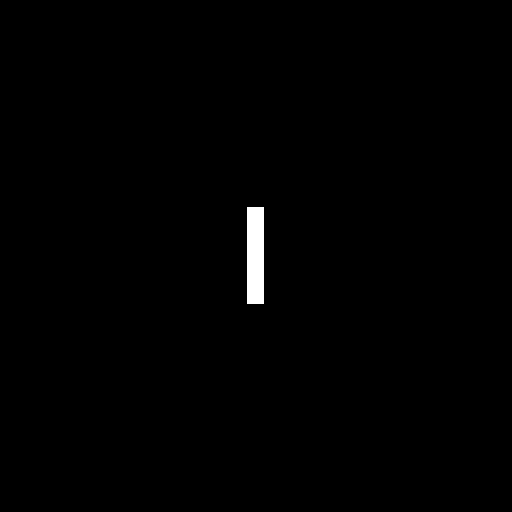

In [112]:
img = cv2.imread('/content/Fig0424(a)(rectangle).tif',0)

dim = (512, 512)
img = cv2.resize(img, dim)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = (20*np.log(np.abs(fshift) + 0.00001)/255)
magnitude_spectrum = np.array(magnitude_spectrum, dtype=np.float32)

cv2_imshow(img)

Abaixo é exibido o espectro de magnitude que foi obtido a partir da DFT e exibido em escala logarítmica para melhor visualização.

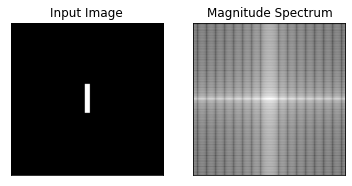

In [113]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

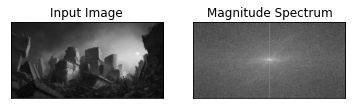

In [2]:
#img = cv2.imread('/content/Fig0424(a)(rectangle).tif', 0)#('dataFreq/t1.jpg',0)
img = cv2.imread('/content/t1.jpg',0)
image_f32 = np.array(img, dtype=np.float32) # convert from uint8 into float32
dft = np.fft.fft2(img, axes=(0,1))
fft_shift = np.fft.fftshift(dft) #aplica FFT e posteriormente a desloca - dica é usar a função presente na numpy
magnitude_spectrum = (20*np.log(np.abs(fft_shift) + 0.00001)/255) # cria o espectro de magnitude 

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## Criando outros kernels - Gaussiano e Butterworth 

### Filtro passa-baixa

O filtro passa-baixa, que retém as informações de baixa frequência da transformada de Fourier e filtra as informações de alta frequência, tornará a imagem mais desfocada. Os filtros passa-baixa comumente usados incluem filtro passa-baixo ideal, filtro passa-baixo Butterworth e filtro passa-baixo Gaussiano. Suponha que a altura e a largura da transformada de Fourier sejam H e W, o valor máximo do espectro de Fourier está no ponto central (maxR,maxC) e D(r,c) representa a distância do ponto (r,c) até o ponto central


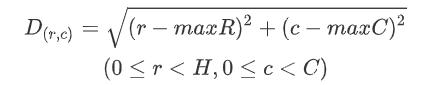


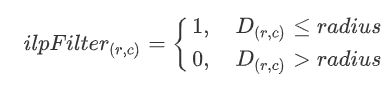


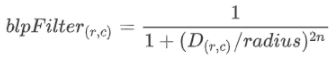


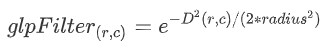

### Filtro passa-alta

O filtro passa-alta retém as informações de alta frequência da imagem e filtra as informações de baixa frequência, o que torna os detalhes da imagem mais óbvios. Os filtros passa-alta comumente usados incluem filtro passa-alto ideal, filtro passa-alto Butterworth e filtro passa-alto gaussiano. Três tipos de filtros passa-altas podem ser expressos da seguinte forma


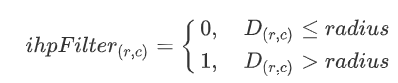

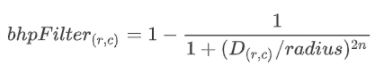


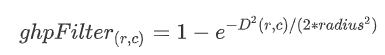

### Filtro passa-banda

O filtro passa-banda serve para reter apenas a banda de frequência de uma determinada área e filtrar as informações de frequência, que podem selecionar seletivamente parte das informações da imagem. Os filtros passa-banda comumente usados incluem filtro passa-banda ideal, filtro passa-banda Butterworth e filtro passa-banda gaussiano. Assumindo que BW representa a largura de banda e D0 representa o centro radial da largura de banda, os três filtros passa banda podem ser expressos da seguinte forma


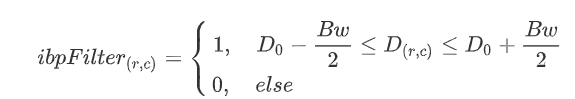


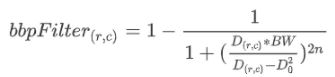


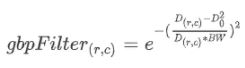

### Filtro rejeita-banda

Em contraste com o filtro passa-banda, o filtro de rejeita-banda se refere a filtrar ou enfraquecer a banda de frequência na faixa especificada. Os filtros de rejeita-banda comumente usados incluem filtro de parada de banda ideal, filtro de parada de banda Butterworth e filtro de parada de banda Gaussiana. Os três filtros de parada de banda são representados da seguinte forma


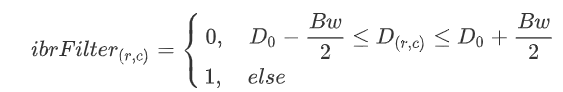


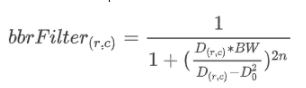

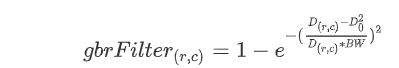

### Funções

Função usada apenas para plotar as imagens usando as funções da biblioteca *matplotlib*.

In [7]:
def plot(img_in):
  fig = plt.figure(figsize=(20,5))
  ax  = fig.add_subplot(1,2,1)
  im  = ax.imshow(img_in,cmap="gray")
  plt.colorbar(im)

Função usada para aplicar o kernel gerado pelas funções abaixo no imagem original a ser utilizada. Inicialmente é feito a DFT, ou seja para passar a imagem do domínio espacial para o da frequência, na sequência feito o shift para colocar as altas frequências no centro da imagem, então a multiplicação da DFT com o kernel. Na sequência para obter a imagem novamente é feito o shift para voltar o centro as bordas, depois a transformada inversa, e por fim é feito um processo de normalização.

In [26]:
def applyFilter(mask):

  dft = np.fft.fft2(img, axes=(0,1)) #DFT para passagem de domínio espacial para frequência

  dft_shift = np.fft.fftshift(dft) #shift das bordas para o centro

  dft_shift_masked = np.multiply(dft_shift,mask)# multiplicação posicional entre o FFT e a mascará - se fosse multiplicação de matrizes, usaria-se @ ou np.dot()

  back_ishift_masked = np.fft.ifftshift(dft_shift_masked) #Shift centro para as bordas

  img_filtered = np.fft.ifft2(back_ishift_masked, axes=(0,1)) #inversa da dft

  img_filtered = np.abs(img_filtered).clip(0,255).astype(np.uint8) #Normalização

  cv2_imshow(img)
  cv2_imshow(img_filtered)

### Filtro Passa Baixa

Começando com um filtro passa baixa ideal onde temos uma barreira abrupta de onde é totalmente atenuado, no caso as frequências fora do circulo (baixas frequências) e dentro do círculo (altas frequêncais) que não sofrem nenhuma atenuação.

A imagem de saída do passa baixa é uma imagem suavizada como visível em sua saída e ainda por ser um **filtro ideal** ele produz o efeito de *ringing* conforme podemos ver na imagem de saída. Logo não é um filtro que tem uma aplicação muito prática. Conforme podemos ver em seu kernel temos a transição abrupta do círculo entre altas e baixas frequências.

Para o **Butterworth** agora não se tem mais uma transição abrupta entre as frequências, logo seu kernel parece com o efeito *vinheta* ou um circulo desfocado. Ao fazer essa transição de forma suave entre as frequências é eliminado o efeito de *ringing* em ordem 1 e 2, mas pode parecer perceptível em ordem maiores. Podemos ver uma imagem muito melhor na saída deste, em comparação ao ideal, onde temos apenas o desfoque.

O **Gaussiano** se assemelha ao Butterworth, no quisito de transição suave entre as frequências porém não produzindo nenhum efeito de *ringing*. O resultado do desfoque ficou bem parecido com o Butterworth, porém uma representação um pouco melhor das bordas para esta situação.

In [5]:
#Filtros Passa Baixa
def creatPB(shape, center, radius, type = 0, n=2):
  kernel_filter = np.zeros((shape))
  rows, cols = shape
  #PB ideal
  if type == 0:
    for i in range(cols):
      for j in range(rows):
        D = np.sqrt((j - center[0])**2 + (i - center[1])**2)
        kernel_filter[j,i] = D < radius
    kernel_filter = np.array(kernel_filter,dtype=bool)

  #PB Butterworth
  elif type == 1:
    for i in range(cols):
      for j in range(rows):
        D = np.sqrt((j - center[0])**2 + (i - center[1])**2)
        kernel_filter[j,i] = 1/(1+(D/radius)**(2*n))
  
  #PB Gauss
  elif type == 2:
    for i in range(cols):
      for j in range(rows):
        D = np.sqrt((j - center[0])**2 + (i - center[1])**2)
        kernel_filter[j,i] = np.exp(((-D**2)/(2*(radius**2))))

  return kernel_filter

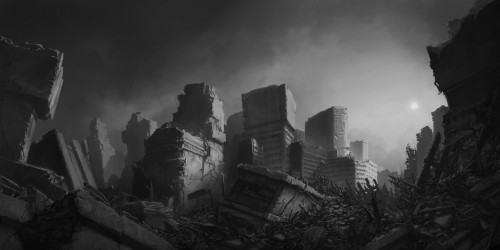

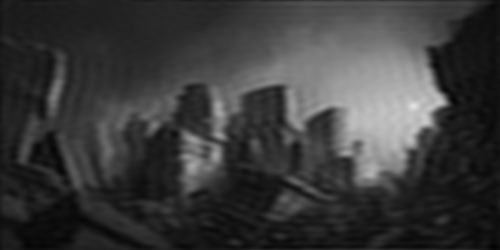

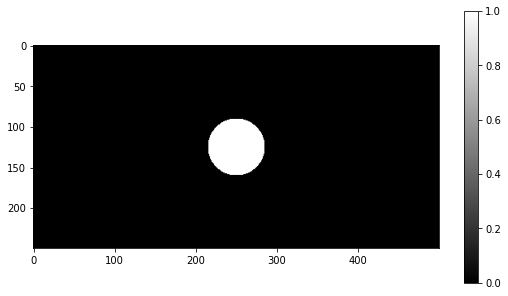

In [132]:
center = np.array(img.shape)/2.0
radius = 35
img_out = creatPB(img.shape, center, radius, 0)
plot(img_out)
applyFilter(img_out)

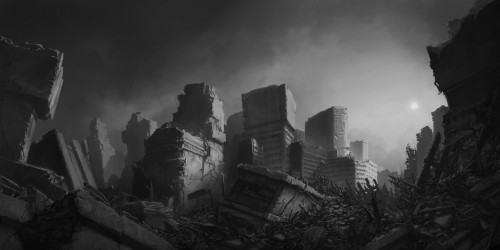

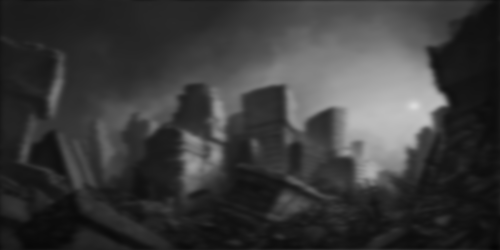

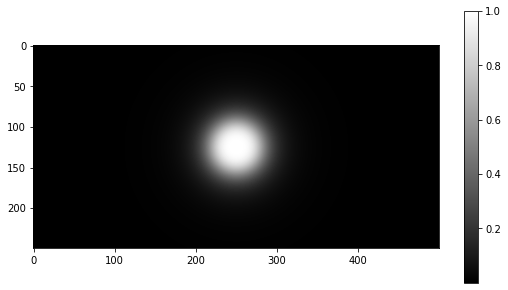

In [129]:
center = np.array(img.shape)/2.0
radius = 35
img_out = creatPB(img.shape, center, radius, 1)
plot(img_out)
applyFilter(img_out)

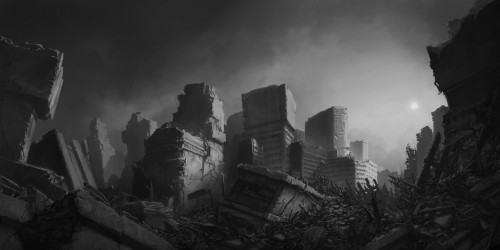

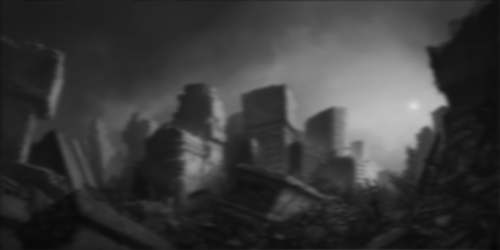

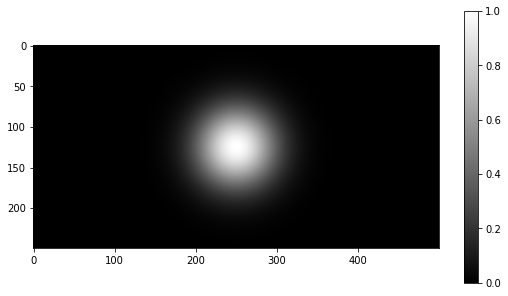

In [128]:
center = np.array(img.shape)/2.0
radius = 35
img_out = creatPB(img.shape, center, radius, 2)
plot(img_out)
applyFilter(img_out)

### Filtro Passa Alta

Os filtos passa alta seguem então o inverso dos filtos passa baixa atenuando as as baixas frequências, dessa forma a definição de borda ganha foco enquanto a destinção de intensidades "lentas" perdem seu valor, deixando assim apenas a silhueta das estreturas na imagem.

Um forma simples de criação destes filtros é a inversão dos filtos passa baixa. Entretando existem modelos matemáticos que consistem em inverter alguns parêmtros na equação do passa baixa ou então fazer de fato a inversão do filtro PB.

Para o **passa alta ideal** encontramos o mesmo problema do passa baixa já que essa transição abrupta também gera efeito de *ringing* no passa alta. Dessa forma a imagem de saída é a silhueta da imagem porém conforme é possível ver meio "tremida". Esse efeito pode ser contornado ao aumentar o valor do raio, quanto maior ele for menos é aparente este efeito de *ringing*.

No **Butterworth** temos uma melhora significativa em relação ao ideal onde as bordas não apresentam *ringing* bem como ficam muito mais aparentes a medidade que aumentamos o raior ficamos com uma borda mais fina que descreve melhor a imagem.

Por fim para o **Gaussiano** que novamente se assemelha ao Butterworth assim como no passa baixa trazendo uma descrição de bordas mais limpa além até para itens pequenos presentes na imagem e uma borda mais fiel as áreas de contraste. Aumentar o raio faz as bordas ficarem mais finas e assim uma descrição melhor das estruturas na imagem.

In [4]:
#Filtros Passa Alta
def creatPA(shape, center, radius, type = 0, n=2):
  kernel_filter = np.zeros((shape))
  rows, cols = shape
  #PA Ideal
  if type == 0:
    kernel_filter = 1 - creatPB(shape, center, radius, 0)
    
  #PA Butterworth
  elif type == 1:
    kernel_filter = 1 - creatPB(shape, center, radius, 1)

  #PA Gauss
  elif type == 2:
    kernel_filter = 1 - creatPB(shape, center, radius, 2)

  return kernel_filter

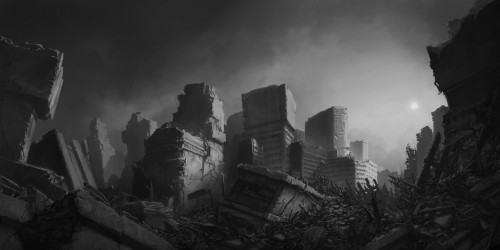

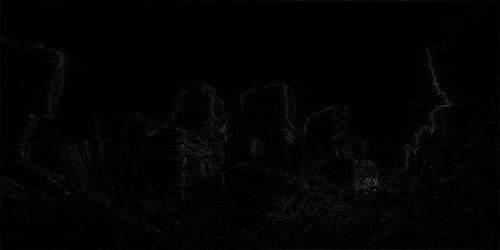

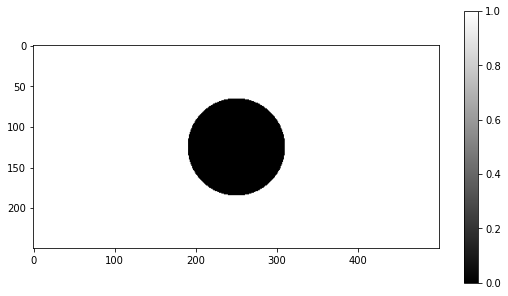

In [127]:
center = np.array(img.shape)/2.0
radius = 1
img_out = creatPA(img.shape, center, radius, 0)
plot(img_out)
applyFilter(img_out)

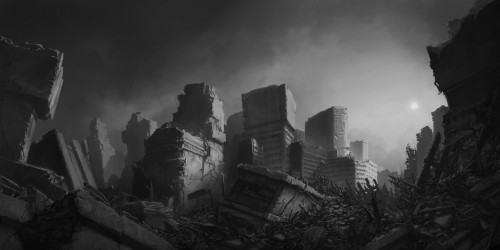

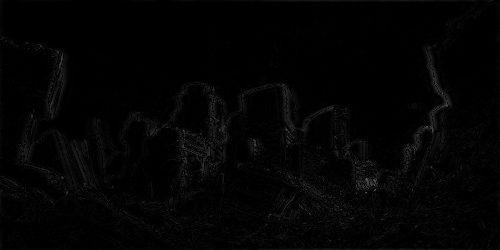

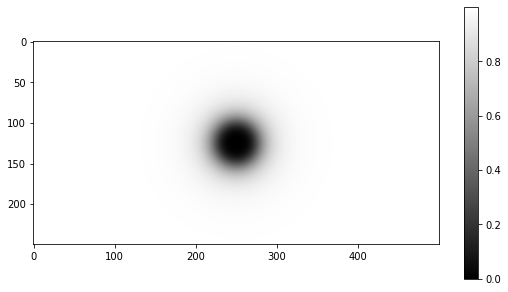

In [126]:
center = np.array(img.shape)/2.0
radius = 30
img_out = creatPA(img.shape, center, radius, 1)
plot(img_out)
applyFilter(img_out)

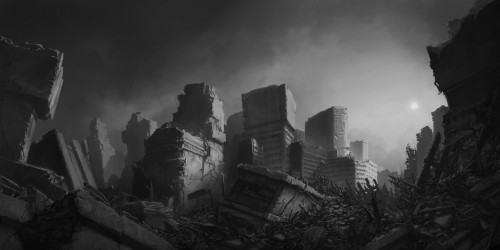

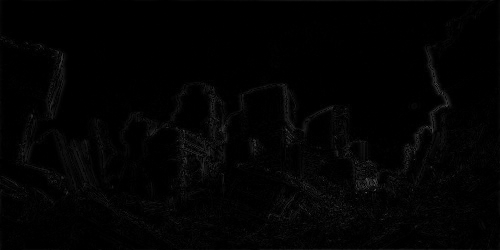

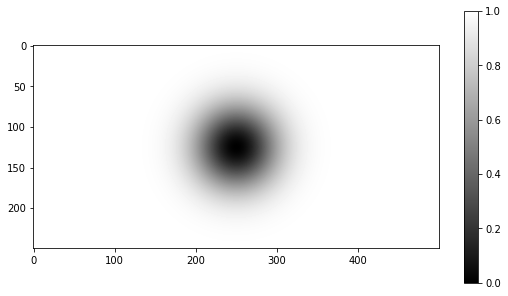

In [125]:
center = np.array(img.shape)/2.0
radius = 30
img_out = creatPA(img.shape, center, radius, 2)
plot(img_out)
applyFilter(img_out)

### Filtro Rejeita Faixa

Conforme já visto anteriormente os filtros **Ideais** sempre vão adicionar o efito de *ringing* para valores pequenos de raio. Para o rejeita faixa iremos poder escolher qual frequência queremos remover. Por exemplo um filtro que vai de 35 até 85 rejeita a faixa da altas frequências mas mantém ainda o centro, logo o resultado é uma imagem que mantém uma certa definição de borda, porém perde outras que estão mais distante do centro. Por outro lado é possível a partir dele construir um passa baixa ideal, fazendo com que o circulo de corte venha de fora e deixe passar apenas as altas frequências, entre outras formas de cortas frequências.

Para **Butterworth** e **Gauss** iremos ter saída novamente parecidas, já que ambos entregam o conceito de uma transição esmaecida. Assim tendo pouco ou nenhum efeito de *ringing* ao fazer o corte das frequências.

In [3]:
#Filtros Rejeita Faixa
def creatRF(shape, center, C, W, type=0, n=2):
  kernel_filter = np.zeros((shape))
  rows, cols = shape

  #RF ideal
  if type == 0:
    for i in range(cols):
      for j in range(rows):
        D = np.sqrt((j - center[0])**2 + (i - center[1])**2)
        if (C - (W/2)) <= (D) and (D) <= (C + (W/2)):
          kernel_filter[j,i] = 0
        else:
          kernel_filter[j,i] = 1

  #RF Butterworth
  elif type == 1:
    for i in range(cols):
      for j in range(rows):
        D = np.sqrt((j - center[0])**2 + (i - center[1])**2)
        kernel_filter[j,i] = 1/(1+((D*W)/((D**2)-(C**2)))**(2*n))

  #RF Gauss
  elif type == 2:
    for i in range(cols):
      for j in range(rows):
        D = np.sqrt((j - center[0])**2 + (i - center[1])**2)
        kernel_filter[j,i] = 1 - np.exp(-((D**2-C**2)/(D*W))**2)
  return kernel_filter

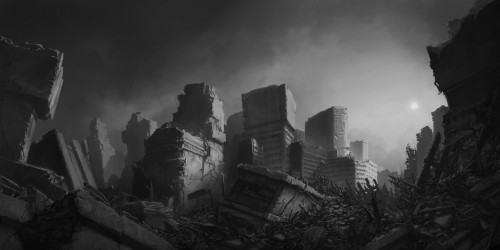

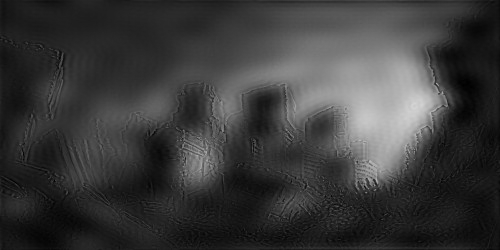

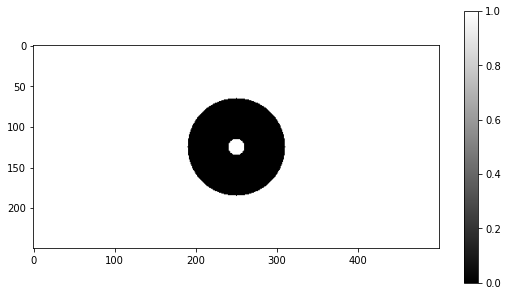

In [25]:
center = np.array(img.shape)/2.0
bc = 35
bw = 50
img_out = creatRF(img.shape, center, bc, bw, 0)
plot(img_out)
applyFilter(img_out)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in double_scalars


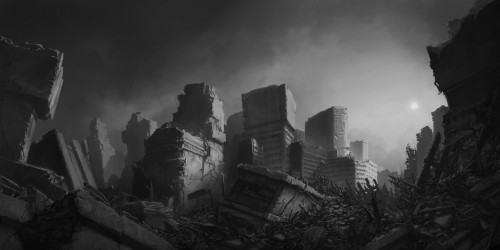

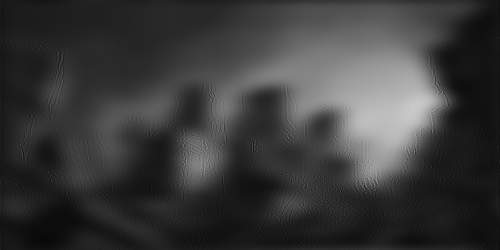

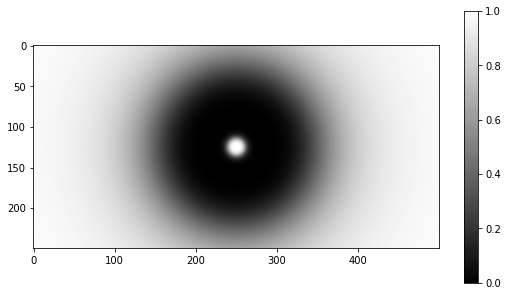

In [123]:
center = np.array(img.shape)/2.0
bc = 35
bw = 100
img_out = creatRF(img.shape, center, bc, bw, 1)
plot(img_out)
applyFilter(img_out)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: RuntimeWarning: divide by zero encountered in double_scalars


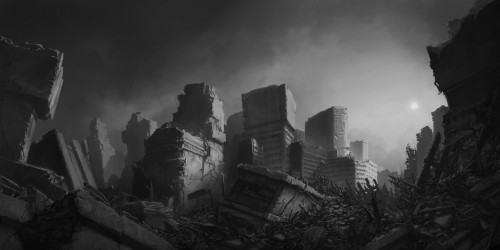

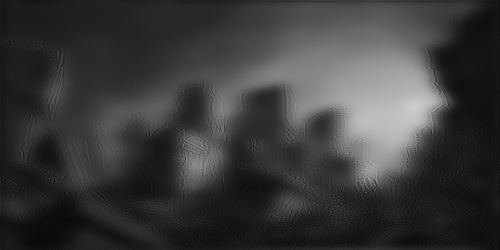

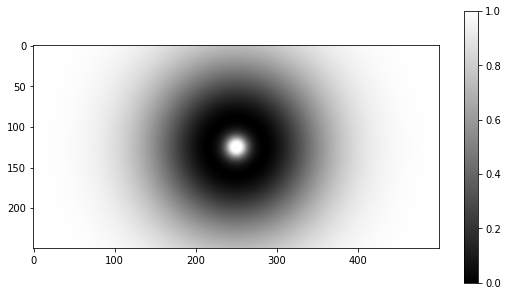

In [122]:
center = np.array(img.shape)/2.0
bc = 35
bw = 100
img_out = creatRF(img.shape, center, bc, bw, 2)
plot(img_out)
applyFilter(img_out)

### Filtro Passa Faixa

O passa faixa se assemelha ao passa alta mas iremos eleminar uma frequência específica. O **Ideal** como já esperado tem o efeito de *ringing*. Sua saída assim não fica com silhetas bem definidas dos cortes de frequência elaborados.

Por fim **Butterworth** e **Gauss** entregam novamente saídas próximas e sem *ringing*.

In [ ]:
#Filtros Passa Faixa
def creatPF(shape, center, C, W, type=0, n=2):
  kernel_filter = np.zeros((shape))
  rows, cols = shape
  #PF ideal
  if type == 0:
    kernel_filter = 1 - creatRF(shape, center, bc, bw, 0)
  #PF Butterworth
  if type == 1:
    kernel_filter = 1 - creatRF(shape, center, bc, bw, 1)
  #PF Gauss
  if type == 2:
    kernel_filter = 1 - creatRF(shape, center, bc, bw, 2)

  return kernel_filter

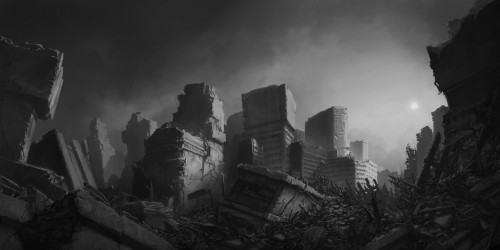

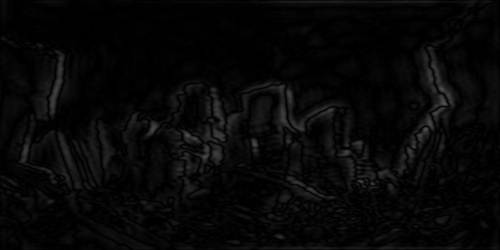

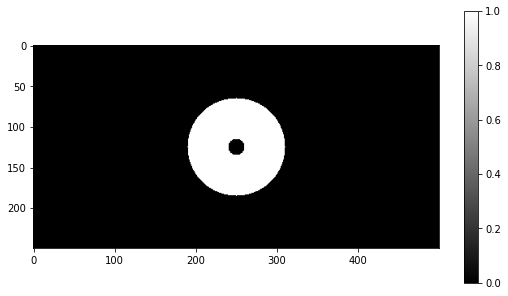

In [121]:
center = np.array(img.shape)/2.0
bc = 35
bw = 50
img_out = creatPF(img.shape, center, bc, bw, 0)
plot(img_out)
applyFilter(img_out)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in double_scalars


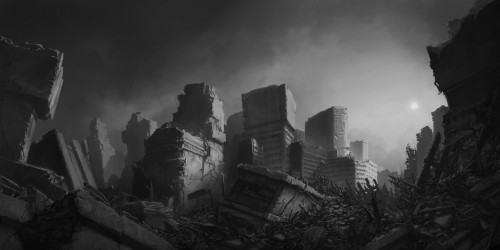

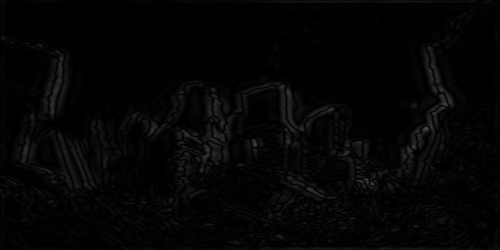

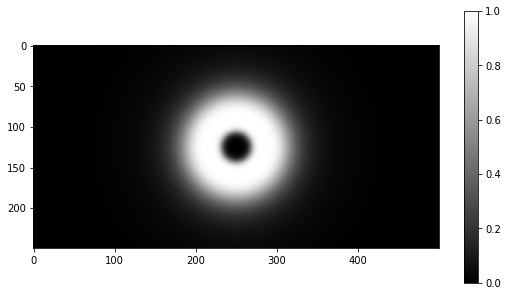

In [120]:
center = np.array(img.shape)/2.0
bc = 35
bw = 50
img_out = creatPF(img.shape, center, bc, bw, 1)
plot(img_out)
applyFilter(img_out)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: RuntimeWarning: divide by zero encountered in double_scalars


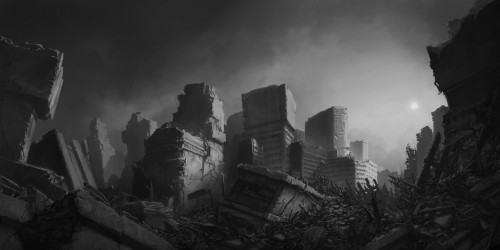

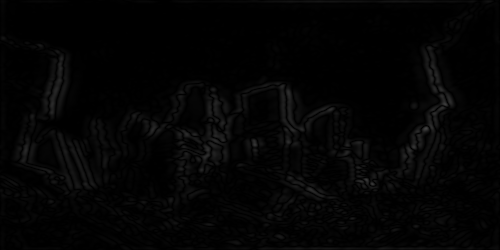

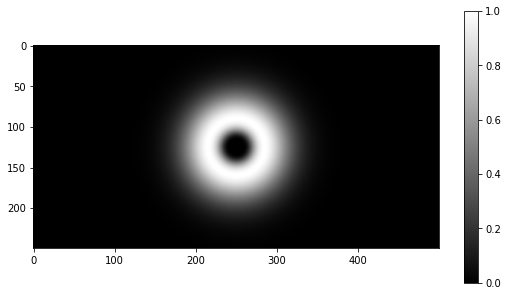

In [119]:
center = np.array(img.shape)/2.0
bc = 35
bw = 50
img_out = creatPF(img.shape, center, bc, bw, 2)
plot(img_out)
applyFilter(img_out)

# Referências

BURGER, W.; BURGE, M. **Digital Image Processing: An Algorithmic In-
troduction Using Java** . Springer London, 2016. (Texts in Computer Science).
ISBN 9781447166849. Disponível em: <https://books.google.com.br/books?id=
YpzWCwAAQBAJ>. <br><br>



GONZALEZ, R.; WOODS, R. **Digital Image Processing**. Pearson, 2018.
ISBN 9781292223049. Disponível em: <https://books.google.com.br/books?id=
XmZvtAEACAAJ>.
<br><br>
Banco de Imagens:<br>
https://imageprocessingplace.com/root_files_V3/image_databases.htm
